In [1]:
import pandas as pd
import numpy as np
from joblib import Parallel, delayed
from datetime import datetime 

import time

In [2]:
#  parameters
circle="Zone"
month="sep2023"
month_doc=6
month_unpaid=9
date='28092023'

In [3]:
df_master = pd.read_csv(f"./{month}/{circle}/Zone_aug23_nc.csv")

C:\Users\daniy\AppData\Local\Temp\ipykernel_2952\3092121225.py:1: DtypeWarning: Columns (6,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_master = pd.read_csv(f"./{month}/{circle}/Zone_aug23_nc.csv")


In [31]:
df = pd.read_csv(f"./{month}/{circle}/{circle}_{date}_merge.csv")

C:\Users\daniy\AppData\Local\Temp\ipykernel_20880\52854990.py:1: DtypeWarning: Columns (7,11,29,31,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"./{month}/{circle}/{circle}_{date}_merge.csv")


In [5]:
df_master.columns

Index(['Unnamed: 0', 'DIV_CODE', 'SDO_CODE', 'SUBSTATION', 'FEEDER', 'ACCT_ID',
       'KNO', 'NAME', 'ADDRESS', 'MOBILE_NO', 'SUPPLY_TYPE',
       'CONSUMPTION_CURR_MNTH', 'CONSUMPTION_PREV_MNTH', 'DOC', 'BILL_BASIS',
       'METER_STATUS', 'METER_READ_REMARK', 'CON_STATUS', 'LOAD', 'MDI',
       'ARREAR', 'CURRENT_ASSESSMENT', 'TOTAL_OUTSTANDING', 'LAST_OK_READING',
       'LAST_OK_READ_STATUS', 'METER_READ_FLTY_CNT', 'LAST_PAY_AMT',
       'LAST_PAY_DATE', 'INDUSTRIAL_FLAG', 'ACCT_INFLALTED_FLAG', 'GOVT_CODE',
       'LAST_BILL_DATE', 'PAYMENT_SRCE', 'TOTAL_PAY_AMT', 'CONSUMER_BASE',
       'paid_status', 'Neverpaid_count', 'Neverpaid_status', 'gov_flag',
       'relGov', 'faulty_Ageing', 'bilable_flag', 'MDI_filter',
       'low_consumtion_filter', 'ARREAR_FILTER', 'Cat', 'LOAD_FILTER'],
      dtype='object')

In [10]:
df['DOC'] = pd.to_datetime(df['DOC'],dayfirst=True)
zone2k_25k =df[(df.gov_flag == False) &(df.bilable_flag == True) & ((df.Cat == 'LMV1') | (df.Cat == 'LMV2')) &(df.CON_STATUS == 'In Service')  ].pivot_table(index='DIV_CODE', columns=['Cat','CONSUMER_BASE','ARREAR_FILTER'], values=['ACCT_ID','TOTAL_OUTSTANDING','TOTAL_PAY_AMT','paid_status','Neverpaid_status'],
                    aggfunc={'ACCT_ID':'count','TOTAL_OUTSTANDING':np.sum,
                            'TOTAL_PAY_AMT':np.sum,'paid_status':np.sum,'Neverpaid_status':np.sum},fill_value=0,margins=True,margins_name='Total' )

In [13]:
# pivot_table.plot(kind='pie',
#             subplots=True,
#               title='Population (1955-2020)',autopct='%1.0f%%')

NeverpaidAug2019 =df[(df.gov_flag == False) &(df.bilable_flag == True) & ((pd.isnull(df['LAST_PAY_DATE'] )) & (df['DOC'] > pd.Timestamp(2020,4, 1))) ].pivot_table(index='DIV_CODE', columns=['Cat'],values=['ACCT_ID','CURRENT_ASSESSMENT','TOTAL_OUTSTANDING',],
                    aggfunc={'ACCT_ID':'count','CURRENT_ASSESSMENT':np.sum,'TOTAL_OUTSTANDING':np.sum},fill_value=0,margins=True,margins_name='Total' )


In [9]:
# pivot_table.plot(kind='pie',
#             subplots=True,
#               title='Population (1955-2020)',autopct='%1.0f%%')

SUBSTATION_FEEDER_AUG =df_master[(df_master.bilable_flag == True)].pivot_table(index='DIV_CODE',values=['SUBSTATION','FEEDER'],
                    aggfunc={'SUBSTATION':pd.Series.nunique,'FEEDER':pd.Series.nunique},fill_value=0,margins=True,margins_name='Total' )


In [3]:
# pivot_table.plot(kind='pie',
#             subplots=True,
#               title='Population (1955-2020)',autopct='%1.0f%%')

load =df[(df.gov_flag == False) &(df.bilable_flag == True) ].pivot_table(index='DIV_CODE', columns=[''],values=['ACCT_ID','CURRENT_ASSESSMENT','TOTAL_OUTSTANDING','TOTAL_PAY_AMT','paid_status'],
                    aggfunc={'ACCT_ID':'count','CURRENT_ASSESSMENT':np.sum,'TOTAL_OUTSTANDING':np.sum,'TOTAL_PAY_AMT':np.sum,'paid_status':np.sum},fill_value=0,margins=True )


In [4]:
# pivot_table.plot(kind='pie',
#             subplots=True,
#               title='Population (1955-2020)',autopct='%1.0f%%')

low_consumtion =df[(df.gov_flag == False) &(df.bilable_flag == True) ].pivot_table(index='DIV_CODE', columns=['low_consumtion_filter'],values=['ACCT_ID'],
                    aggfunc={'ACCT_ID':'count'},fill_value=0,margins=True )


In [6]:
# pivot_table.plot(kind='pie',
#             subplots=True,
#               title='Population (1955-2020)',autopct='%1.0f%%')

mdi_load =df[(df.gov_flag == False) &(df.bilable_flag == True) ].pivot_table(index='DIV_CODE', columns=['MDI_filter'],values=['ACCT_ID'],
                    aggfunc={'ACCT_ID':'count'},fill_value=0,margins=True )


In [35]:
# pivot_table.plot(kind='pie',
#             subplots=True,
#               title='Population (1955-2020)',autopct='%1.0f%%')

Zone_arrear_billed =df[(df.gov_flag == False) & (df.CON_STATUS == 'In Service') ].pivot_table(index=['DIV_CODE','ARREAR_FILTER'], columns=['Cat'],values=['ACCT_ID','CURRENT_ASSESSMENT','TOTAL_OUTSTANDING','curr_paid_amount','paid_status_curr'],
                    aggfunc={'ACCT_ID':'count','CURRENT_ASSESSMENT':np.sum,'TOTAL_OUTSTANDING':np.sum,'curr_paid_amount':np.sum,'paid_status_curr':np.sum},fill_value=0,margins=True,observed=True )


In [15]:
# pivot_table.plot(kind='pie',
#             subplots=True,
#               title='Population (1955-2020)',autopct='%1.0f%%')

Zone_arrear_2k_25k =df[(df.gov_flag == False) & (df.CON_STATUS == 'In Service') & (df.ARREAR_FILTER=='>=2k-25k')].pivot_table(index='DIV_CODE',columns=['Cat'],values=['ACCT_ID','CURRENT_ASSESSMENT','TOTAL_OUTSTANDING','TOTAL_PAY_AMT','paid_status'],
                    aggfunc={'ACCT_ID':'count','CURRENT_ASSESSMENT':np.sum,'TOTAL_OUTSTANDING':np.sum,'TOTAL_PAY_AMT':np.sum,'paid_status':np.sum},fill_value=0,margins=True)


In [16]:
# pivot_table.plot(kind='pie',
#             subplots=True,
#               title='Population (1955-2020)',autopct='%1.0f%%')

Newconnection2020=df[(df['DOC'] > pd.Timestamp(2020,4, 1))].pivot_table(index='DIV_CODE', columns=['Cat'],values=['ACCT_ID','CURRENT_ASSESSMENT','TOTAL_OUTSTANDING',],
                    aggfunc={'ACCT_ID':'count','CURRENT_ASSESSMENT':np.sum,'TOTAL_OUTSTANDING':np.sum},fill_value=0,margins=True,margins_name='Total' )


<Axes: title={'center': 'Population (1955-2020)'}, ylabel='ACCT_ID'>

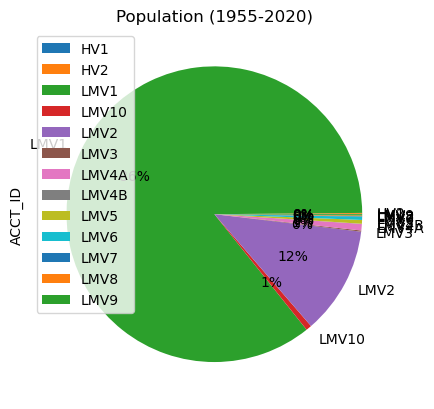

In [15]:
df[(df.bilable_flag == True) & (df.DIV_CODE =='DIV354921' )].pivot_table(index='Cat', 
                    aggfunc={'ACCT_ID':'count'},fill_value=0).plot(kind='pie',
              y='ACCT_ID',
              title='Population (1955-2020)',autopct='%1.0f%%'
              )

In [10]:
df1 = df[(df['gov_flag'] == False)]

In [15]:

circle="Zone"
month="aug2023"
NeverpaidAug2019.to_excel(f"{month}/{circle}/{circle}_Never2020_cat.xlsx")

In [17]:
Newconnection2020.to_excel(f"{month}/{circle}/{circle}_New2020_cat.xlsx")

In [11]:
df1 =  df1[df1['bilable_flag'] == True]

In [12]:
df1 = df1[df1['TOTAL_OUTSTANDING'] >= 2500000]

In [13]:
df1.to_excel("25lac-grto_excellist-gonda.xlsx")

In [11]:
SUBSTATION_FEEDER_AUG.to_excel(f"{month}/{circle}/sub-feeder.xlsx")

In [36]:
Zone_arrear_billed.to_excel(f"{month}/{circle}/{circle}_arrear_billed.xlsx")

In [16]:

circle="Zone"
month="aug2023"
Zone_arrear_2k_25k.to_excel(f"{month}/{circle}/{circle}_arrear2k_25k.xlsx")


In [17]:

circle="Zone"
month="aug2023"
Zone_arrear.to_excel(f"{month}/{circle}/{circle}_arrear.xlsx")

In [4]:
Zone_5_9kw_list = df[(df.gov_flag == False) & (df.bilable_flag == True) & (df.LOAD_FILTER=='5-9kw')]

In [7]:
circle="Zone"
month="aug2023"
Zone_5_9kw_list.to_csv(f"{month}/{circle}/{circle}_aug23_5_9_list.csv") 

In [8]:
circle="Zone"
month="aug2023"
month_doc=6
month_unpaid=8

In [9]:
import os

mylist = os.listdir(f"{month}/{circle}/billed")

In [10]:
def loop(file_name):
    return pd.read_csv(f"{month}/{circle}/billed/{file_name}")

In [11]:
mylist

['BILLED_MVVNL_DIV354921_28092023.csv',
 'BILLED_MVVNL_DIV354922_28092023.csv',
 'BILLED_MVVNL_DIV354923_28092023.csv',
 'BILLED_MVVNL_DIV355131_28092023.csv',
 'BILLED_MVVNL_DIV355132_28092023.csv',
 'BILLED_MVVNL_DIV355133_28092023.csv',
 'BILLED_MVVNL_DIV355211_28092023.csv',
 'BILLED_MVVNL_DIV355212_28092023.csv',
 'BILLED_MVVNL_DIV355213_28092023.csv',
 'BILLED_MVVNL_DIV355214_28092023.csv']

In [12]:
start = time.time()
billed = []
billed = Parallel(n_jobs=-1, verbose=10,prefer="threads")(delayed(loop)(file_name) for file_name in mylist)
billed = pd.concat(billed, ignore_index=True)

end = time.time()
print("CSV:", end - start)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
C:\Users\daniy\AppData\Local\Temp\ipykernel_20880\2875149970.py:2: DtypeWarning: Columns (1,7,19,20,24,25,26,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{month}/{circle}/billed/{file_name}")
C:\Users\daniy\AppData\Local\Temp\ipykernel_20880\2875149970.py:2: DtypeWarning: Columns (0,5,7,19,24,25,26,41,48,50) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{month}/{circle}/billed/{file_name}")
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    7.9s remaining:   18.6s
C:\Users\daniy\AppData\Local\Temp\ipykernel_20880\2875149970.py:2: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{month}/{circle}/billed/{file_name}")
C:\Users\daniy\AppData\Local\Temp\ipykernel_20880\2875149970.py:2: DtypeWarning: Columns (38,49,52) have

CSV: 18.862184047698975


In [18]:
billed.dtypes

ACCT_ID                   object
BOOK_NO                   object
SCNO                      object
NAME                      object
ADDRESS                   object
MOBILE_NO                 object
TARIFF_TYPE               object
SANCTION_LOAD             object
SANCTION_LOAD_UOM         object
SUBSTATION                object
FEEDER                    object
DT                        object
POLE_NO                   object
METER_SERIAL_NBR          object
METER_READ_REMARK         object
MR_SOURCE_CODE            object
BILL_BASIS                object
DUE_DATE                  object
LAST_PAY_DATE             object
LAST_PAYMENT_AMOUNT       object
AMOUNT_PAYABLE            object
BILL_TYP                  object
BILL_DATE                 object
BILL_CRE_DTTM             object
BILLED_UNITS              object
BILL_ID                   object
CA                        object
BILL_INF_FLG              object
SBM_MACHINE_ID            object
DISCOM                    object
ZONE_CODE 

In [19]:
df.dtypes

Unnamed: 0                 int64
DIV_CODE                  object
SDO_CODE                  object
SUBSTATION                object
FEEDER                    object
ACCT_ID                  float64
KNO                       object
NAME                      object
ADDRESS                   object
MOBILE_NO                float64
SUPPLY_TYPE               object
CONSUMPTION_CURR_MNTH    float64
CONSUMPTION_PREV_MNTH    float64
DOC                       object
BILL_BASIS                object
METER_STATUS              object
METER_READ_REMARK         object
CON_STATUS                object
LOAD                     float64
MDI                      float64
ARREAR                   float64
CURRENT_ASSESSMENT       float64
TOTAL_OUTSTANDING        float64
LAST_OK_READING          float64
LAST_OK_READ_STATUS       object
METER_READ_FLTY_CNT      float64
LAST_PAY_AMT             float64
LAST_PAY_DATE             object
INDUSTRIAL_FLAG           object
ACCT_INFLALTED_FLAG       object
GOVT_CODE 

In [22]:
billed['ACCT_ID'] = pd.to_numeric(billed['ACCT_ID'],errors='coerce')

In [23]:
billed.dtypes

ACCT_ID                  float64
BOOK_NO                   object
SCNO                      object
NAME                      object
ADDRESS                   object
MOBILE_NO                 object
TARIFF_TYPE               object
SANCTION_LOAD             object
SANCTION_LOAD_UOM         object
SUBSTATION                object
FEEDER                    object
DT                        object
POLE_NO                   object
METER_SERIAL_NBR          object
METER_READ_REMARK         object
MR_SOURCE_CODE            object
BILL_BASIS                object
DUE_DATE                  object
LAST_PAY_DATE             object
LAST_PAYMENT_AMOUNT       object
AMOUNT_PAYABLE            object
BILL_TYP                  object
BILL_DATE                 object
BILL_CRE_DTTM             object
BILLED_UNITS              object
BILL_ID                   object
CA                        object
BILL_INF_FLG              object
SBM_MACHINE_ID            object
DISCOM                    object
ZONE_CODE 

In [31]:
 combine= pd.concat([df, billed], axis=1, join_axes=[df.ACCT_ID])

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [24]:
# using keys from left frame
res = pd.merge(Zone_5_9kw_list, billed, how='left', on=['ACCT_ID'])